The goal of this analysis is to find the most popular real estate neighborhood in the New York City.

step1: read all the data

In [9]:
import os
import json


import pandas as pd
import numpy as np
#os.chdir("C:/Users/jiang/Documents/kaggle")
import matplotlib.pyplot as plt
train_df = pd.read_json("train.json")


step2: extract the longtitude and latitude info

In [2]:
train_coords = train_df[["listing_id", "latitude", "longitude"]]
lat= []
lon = []
listings = []

for i, j in train_coords.iterrows():
    lat.append(j["latitude"])
    lon.append(j["longitude"])
    listings.append(int(j["listing_id"]))

step3:identify the zipcode of the listing from the lon and lat

In [3]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()

res = []
for i in range(len(listings)):
    try:
        res.append([listings[i],search.by_coordinate(lat[i], lon[i], radius=1, returns=1)[0]['Zipcode']])
    except:
        continue
nbd_df = pd.DataFrame(res, columns = ['listing_id','zipcode'])

step4:get the neigborhood info from the csv file

In [5]:
zip_n = pd.read_csv("C:\Users\jiang\Documents\kaggle\zip_n.csv",header =0 )
zip_n['zipcode'] = zip_n.apply(lambda row: str(row.zipcode), axis=1)


step5:merge data together

In [10]:
train_df = train_df.merge(nbd_df, left_on='listing_id', right_on='listing_id', how='left')
train_df = train_df.merge(zip_n, left_on='zipcode', right_on='zipcode', how='left')

train_df['interest'] = train_df.interest_level == 'high'
interest_high = train_df.groupby('neighborhood')['interest'].mean()
list_count = train_df.groupby('neighborhood')['neighborhood'].count()
  

step5:print the top 5 neighborhood. There are a few neighborhood with very few listing, which may inflate the ratio of high interest listing. I am only looking at neighborhood with more than 100 listing.

In [11]:
interest_high[list_count > 100].sort_values(ascending=False).head(5)

neighborhood
Kew Gardens             0.283019
Crown Heights North     0.267241
Beverley Square West    0.192893
Flatbush                0.192893
Ditmas Park West        0.192893
Name: interest, dtype: float64

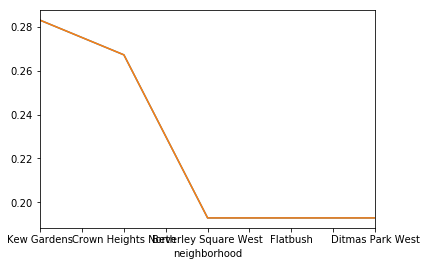

In [13]:
interest_high[list_count > 100].sort_values(ascending=False).head(5).plot()  
plt.show()